# RIGA  TECHNICAL UNIVERSITY

## FACULTY OF COMPUTER SCIENCE AND INFORMATION TECHNOLOGY


### Fundamentals of Computer Graphics and Image Processing 
### "Beziér curve algorithm implementation for 2D object animation" 
#### Name, Surname: Sofiia Azhniuk

#### 1 year, 1 group 
#### Student ID: 221ADB207





### Task description 
Develop an application in Python environment with the possibility of moving a 2D object (point, circle, quadrangle, etc.) using a curve implemented through a Beziér curve algorithm.<br>
Realize the object movement from first control point to last control point using a curve trajectory in real time(animation)<br>
Curve must have at least 3 control points<br>
User must see the visualized object path (trajectory) as well as all control points<br>
User must see object movement (animation)<br>
The user should be able to define all the control points of the curve (with mouse clicks or text input fields) by using the User Interface<br>
Do not use built-in methods functions or libraries to create a curve, a Beziér curve drawing algorithm (from the lecture) must be implemented!<br>
Built-in functions may be used to draw the 2D object<br>
Console programs (without user interface) will not be accepted.

### Theoretical description of the topic
That task requires the knowledge of the Tkinter library, the Bezier curve algorithm, and the basics of OOP to work with functions and classes(class).<br>

The <strong>Bezier</strong> equation computes a point on the curve for a given value by recursively combining the control points. The resulting curve always passes through the first and last control points, and is influenced by the other control points, <strong>but does not necessarily pass through them</strong>. This allows the curve to smoothly interpolate between the control points, resulting in a smooth, continuous curve. 

<strong>Tkinter</strong> is a Python module that allows us to work with GUI. Tkinter provides a variety of widgets, such as buttons, labels, and text boxes, that can be used to build user interfaces. Tkinter is commonly used for creating simple GUI programs, and games, where users can interact with the application.
<br>
<br>



### Theoretical description algorithm used in the course work variant
This code is a Python implementation of a GUI application using the tkinter module. The application creates a window with a canvas on which the user can create points by clicking the right mouse button. These points are then used to draw a Bezier curve on the canvas. The application also has two buttons: "Animate" and "Delete". The "Animate" button animates the curve by moving a dot along it, while the "Delete" button clears the curve from the canvas.

The Example class is a subclass of tk.Frame and represents the main window of the application. In the main method  _init_ , the window and canvas are created with their proporties, and the buttons are added to the window. The "Animate" and "Delete" buttons have corresponding command callback functions move and clearAll, which are called when the buttons are clicked. The createPoint method is called whenever the user clicks the right mouse button on the canvas, and it creates a point at the given coordinates.

The curveThreePoints, curveFourPoints, and curveFivePoints methods are used to draw a Bézier curve on the canvas using the given points depending on the number of points. These methods first clear any existing points and the curve from the canvas, and then compute the coordinates of the curve using the Bezier equation. Finally, the coordinates are used to draw the curve on the canvas as a series of small circles. The animate method is used to animate the curve by moving a red dot along it. The clear method is used to clear all points and the curve from the canvas.

#### Python libraries/packages:
<ul>
    <li>
        Tkinter


<div>
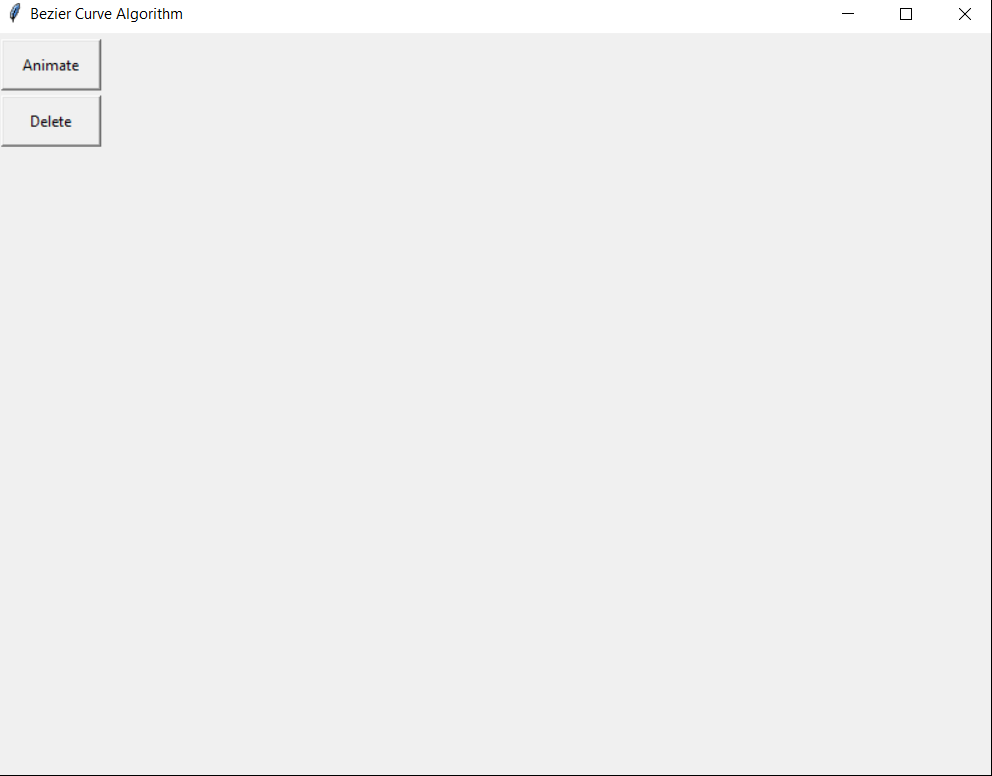
    <h3><center>Main window</center></h3>
</div>

<br>
<br>
<div>
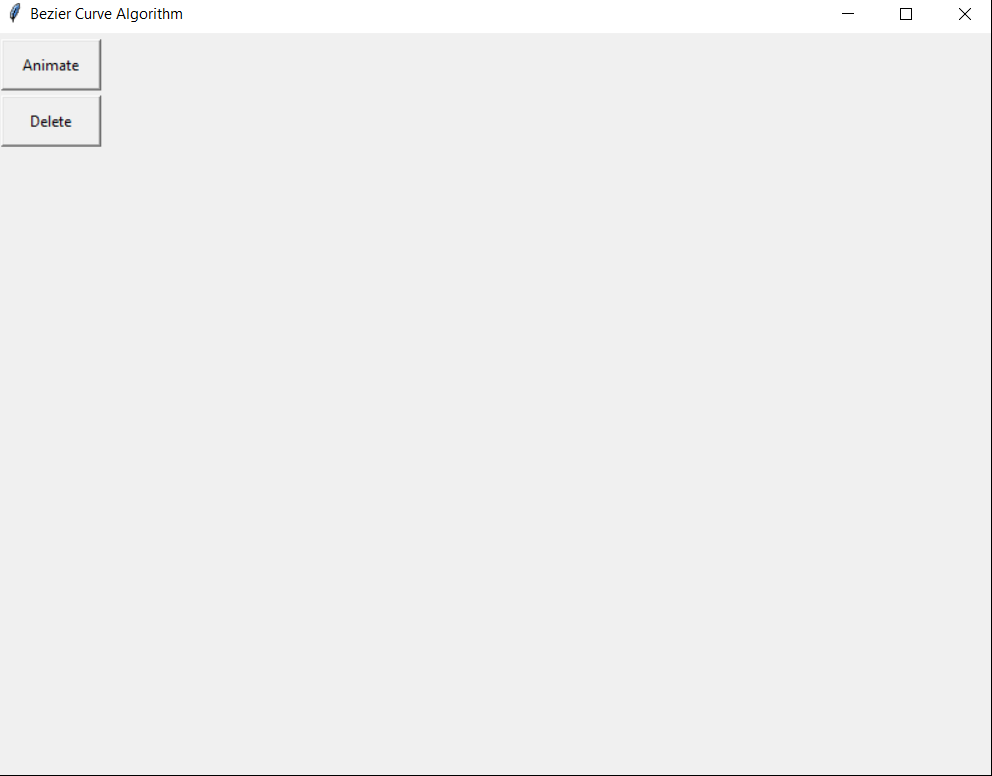
     <h3><center>With selected points, where you can animate the curve</center></h3>
</div>



#### Information sources:   
Sites:<br>

<ul>
    <li>
        <a href="https://estudijas.rtu.lv/pluginfile.php/3670457/mod_label/intro/FCGIP-2022-Lecture_3.pdf">Presentation.</a> Bezier Curve Drawing Algorithm 
    </li>
    <li>
        <a href="https://www.youtube.com/watch?v=YXPyB4XeYLA&t=35s">Main YouTube course</a>, where I learned the structure and the syntax of tkinter 
    </li>
    <li>
        <a href="https://stackoverflow.com/questions/32289175/list-of-all-tkinter-events">Tkinter Events </a> documentation
    </li>
    <li>
        <a href="https://gist.github.com/PM2Ring/d6a19f5062b39467ac669a4fb4715779">GitHub;</a> Main Sourse of code
    </li>
    <li>
        My notes <a href="https://docs.google.com/document/d/1ccglYhV7fvJCDA3Qjlh4sRH3SZlbTHfa_hZ1TCX5rls/edit?usp=sharing">file</a>. 
    </li>
<ul>
    <br>
    
Mostly I used the Stackoverflow pages to create and modify the code. Also, I found useful the 
    <a href = "https://docs.python.org/3/library/tk.html"> Documentation of tkinter library.</a><br>
    Another sourse of code and information was the file for "2 Practical exercise-Bezier Curve", which is available on ORTUS. 
    
        
   

### Course work practical part
 
#### Variant 207

In [15]:
import tkinter as tk

class Example(tk.Frame):
    def __init__(self, parent):        
        frame = tk.Frame.__init__(self, parent)

        # create a canvas and parameters
        self.canvas = tk.Canvas(root)
        self.canvas.pack(fill=tk.BOTH, expand=True)
        
        self.pointscoords = []
        
        
        # Buttons to add new Dots to the canvas and delete them
        self.animateButton = tk.Button(frame, text="Animate", 
                                     relief="raised",
                                     command = lambda: self.move())
        self.animateButton.config(height = 2, width = 10 )
        self.animateButton.place(x=5, y=5)
        self.animateButton.state = True
        
        self.deleteButton = tk.Button(frame, text="Delete", 
                                     relief="raised",
                                     command = lambda: self.clearAll())
        
        self.deleteButton.config( height = 2, width = 10 )
        self.deleteButton.place(x=5, y=50)
        self.deleteButton.state = True


        # on mouse click create a point
        self.canvas.bind("<Button-3>", lambda event: self.createPoint(event.x, event.y))
        
        
        
    #functions
    def createPoint(self, x, y):
        if (len(self.pointscoords) <= 4):
            #Create a point at the given coordinate in the given color
            self.canvas.create_oval(
                x - r,
                y - r,
                x + r,
                y + r,
                outline="black",
                fill="blue",
                tags=("token"),
            )
            
            self.pointscoords.append((x, y))
            
            
            if(len(self.pointscoords) == 3):
                self.curveThreePoints(motion)
            elif (len(self.pointscoords) == 4):
                self.curveFourPoints(motion)
            elif (len(self.pointscoords) == 5):
                self.curveFivePoints(motion)

                

    # beizer curve for 3 points
    def curveThreePoints(self, motion):
        self.clear()
        coords = []
        x0, y0 = self.pointscoords[0]
        x1, y1 = self.pointscoords[1]
        x2, y2 = self.pointscoords[2]
        
        for t in range(0, 1000):
            #to change t from 0 to 1
            t /= 1000
            x = (1 - t)**2 * x0 + 2 * (1-t) * t * x1 + t**2 * x2
            y = (1 - t)**2 * y0 + 2 * (1-t) * t * y1 + t**2 * y2
            coords.append((x, y))
            #points for curve
            self.canvas.create_oval(x, y, x, y, outline="", fill="red")
            
        if(motion):
            self.animate(x, y, coords)
            motion = False
        return coords
            
        
   # beizer curve for 4 points
    def curveFourPoints(self, motion):
        self.clear()
        coords = []
        x0, y0 = self.pointscoords[0]
        x1, y1 = self.pointscoords[1]
        x2, y2 = self.pointscoords[2]
        x3, y3 = self.pointscoords[3]
        for t in range(0, 1000):
            t /= 1000
            x = (1 - t) ** 3 * x0 + 3 * t * (1 - t) ** 2 * x1 + 3 * t ** 2 * (1 - t) * x2 + t ** 3 * x3
            y = (1 - t) ** 3 * y0 + 3 * t * (1 - t) ** 2 * y1 + 3 * t ** 2 * (1 - t) * y2 + t ** 3 * y3
            coords.append((x, y))
            #points for curve
            self.canvas.create_oval(x, y, x, y, outline="", fill="red")
            
        if(motion):
            self.animate(x, y, coords)
            motion = False
        return coords
    
     # beizer curve for 5 points
    def curveFivePoints(self, motion):
        self.clear()
        coords = []
        x0, y0 = self.pointscoords[0]
        x1, y1 = self.pointscoords[1]
        x2, y2 = self.pointscoords[2]
        x3, y3 = self.pointscoords[3]
        x4, y4 = self.pointscoords[4]
        
       
        for t in range(0, 1000):
            t /= 1000
            x = (1 - t) ** 4 * x0 + 4 * t * (1 - t) ** 3 * x1 + 6 * t ** 2 * (1 - t) ** 2 * x2 +  4 * t ** 3 * (1 - t) * x3 + t ** 4 * x4
            y = (1 - t) ** 4 * y0 + 4 * t * (1 - t) ** 3 * y1 + 6 * t ** 2 * (1 - t) ** 2 * y2 +  4 * t ** 3 * (1 - t) * y3 + t ** 4 * y4
            coords.append((x, y))
            #points for curve
            self.canvas.create_oval(x, y, x, y, outline="", fill="red")
            
        if(motion):
            self.animate(x, y, coords)
            motion = False
        return coords
    
    
    
    def animate(self, x, y, coords):
        self.canvas.create_oval(x, y, x, y, outline="", fill="blue")
        oval = self.canvas.create_oval(coords[0][0] - 5, coords[0][1] - 5, coords[1][0] + 5, coords[1][1] + 5,
                                       outline="", 
                                       fill="red", 
                                       width=20)
        for i in range(1, len(coords)):
            #print(coords[i])
            self.canvas.move(oval, coords[i][0] - coords[i - 1][0], coords[i][1] - coords[i - 1][1])
            self.canvas.update()
        self.canvas.delete(oval)
        return coords
    
    
    #to animate the curve
    def move(self):
        motion = True
        if (len(self.pointscoords) == 3):
            self.curveThreePoints(motion)
        if (len(self.pointscoords) == 4):
            self.curveFourPoints(motion)
        if (len(self.pointscoords) == 5):
            self.curveFivePoints(motion)
        
        return motion

    def clear(self):
        self.canvas.delete("all")
        for x, y in self.pointscoords:
            self.canvas.create_oval(x - r, y - r, x + r, y + r, outline="black", fill="blue", tags=("token",))
    
    def clearAll(self):
        self.pointscoords.clear()
        self.canvas.delete("all")
      


            
            

if __name__ == "__main__":
    #the radius of an oval
    r = 6
    motion = False
    
    #create a window and set parameters of a window
    root = tk.Tk()
    width = 800
    height = 600
    
    #center it    
    screen_width = root.winfo_screenwidth()
    screen_height = root.winfo_screenheight()
    center_x = int(screen_width/2 - width / 2)
    center_y = int(screen_height/2 - height*6/10)
        
    root.geometry(f'{width}x{height}+{center_x}+{center_y}')
    root.title('Bezier Curve Algorithm')
   
        
    Example(root).pack( fill = 'both' , expand = False)
    
    root.mainloop()
  
